In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [83]:
df= pd.read_csv('/content/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
df.shape

(418, 12)

In [85]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [87]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [89]:
df.drop('Cabin',axis=1,inplace=True)

In [90]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [91]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [92]:
df.duplicated().sum()

0

In [93]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<ipython-input-94-25ab5faa84c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='plasma')


<Axes: >

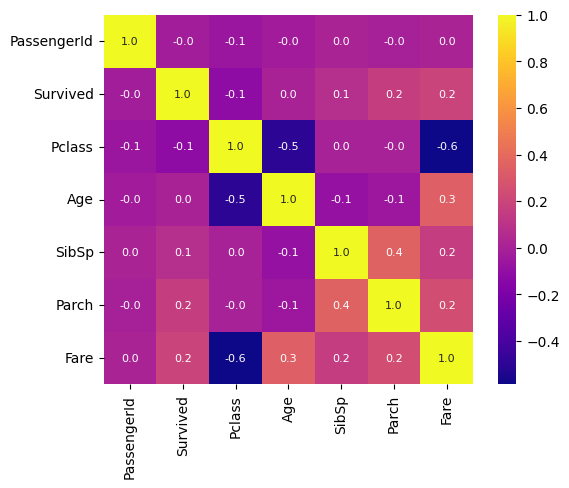

In [94]:
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='plasma')

In [95]:
for column in df.columns:
    unique_values = df[column].unique()
    if unique_values.size > 0:
        print(column, "has", unique_values.size, "unique values", unique_values)
    else:
        print(column, "doesn't have any unique values")

PassengerId has 331 unique values [ 892  893  894  895  896  897  898  899  900  901  903  904  905  906
  907  908  909  910  911  912  913  915  916  917  918  919  920  922
  923  924  926  927  929  930  932  934  935  936  937  938  940  941
  942  943  944  945  947  948  949  951  952  953  954  955  956  958
  959  960  961  962  963  964  965  966  967  969  970  971  972  973
  974  978  979  981  982  984  986  987  988  989  990  991  992  993
  995  996  997  998 1001 1002 1004 1005 1006 1007 1009 1010 1011 1012
 1014 1015 1017 1018 1020 1021 1022 1023 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1039 1041 1042 1045 1046 1047 1048 1049
 1050 1051 1053 1054 1056 1057 1058 1059 1061 1063 1064 1066 1067 1068
 1069 1070 1071 1072 1073 1074 1076 1077 1078 1079 1081 1082 1084 1085
 1086 1087 1088 1089 1090 1093 1094 1095 1096 1098 1099 1100 1101 1102
 1104 1105 1106 1107 1109 1110 1112 1113 1114 1115 1116 1118 1120 1121
 1122 1123 1124 1126 1127 1128 1129 1130 11

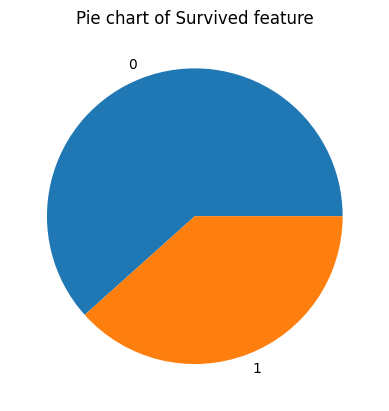

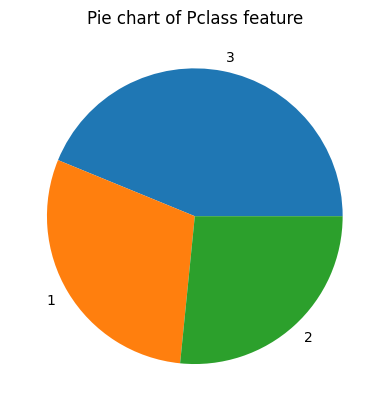

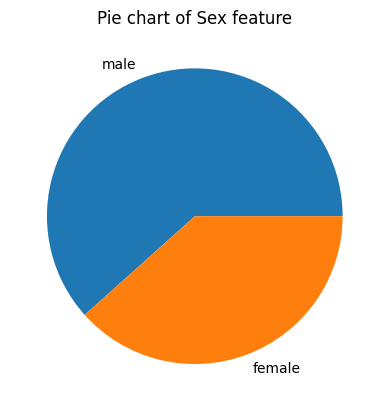

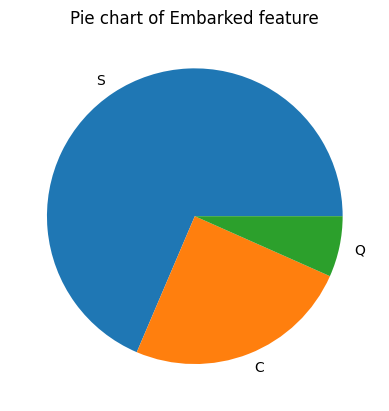

In [96]:
for column in df.columns:
    unique_values = df[column].unique()
    if 0 < unique_values.size <= 3:
        counts = df[column].value_counts()
        # Create a pie chart with the counts
        plt.pie(counts, labels=counts.index)
        plt.title(f"Pie chart of {column} feature")
        # Show the pie chart
        plt.show()

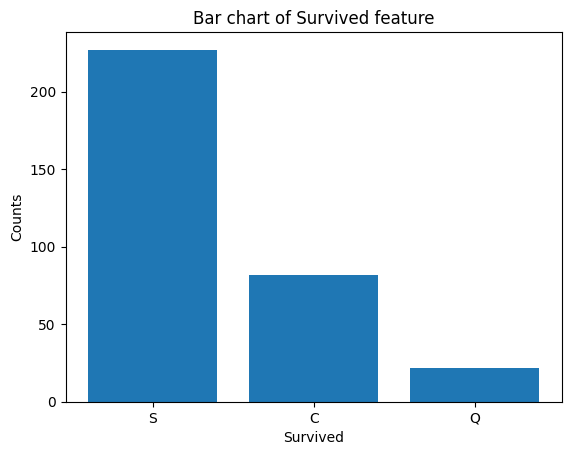

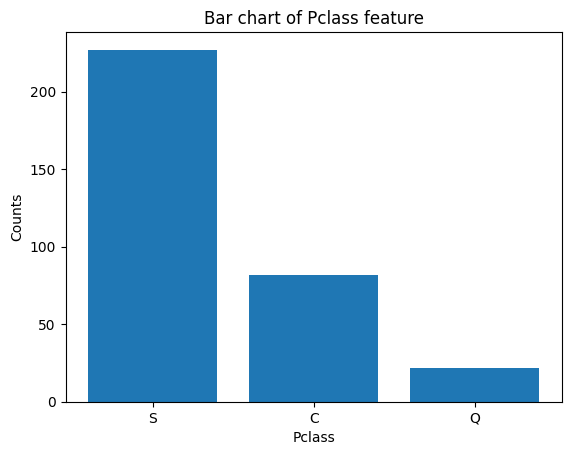

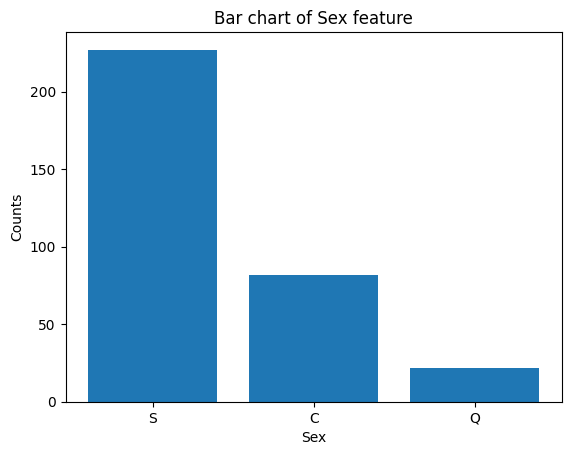

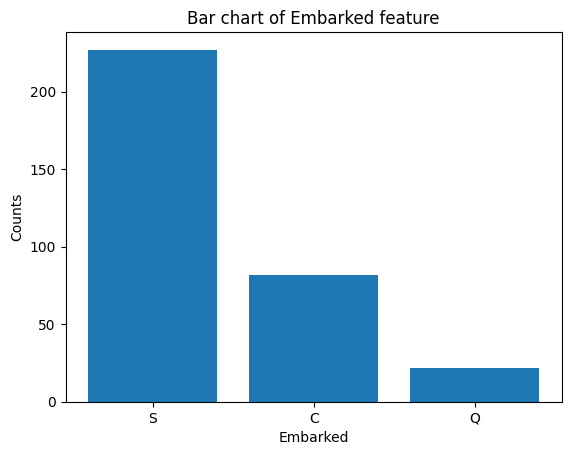

In [97]:
for column in df.columns:
    unique_values = df[column].unique()
    if 0 < unique_values.size <= 3:

        # Create a bar chart with the counts
        plt.bar(counts.index, counts)
        plt.title(f"Bar chart of {column} feature")
        plt.xlabel(column)
        plt.ylabel("Counts")
        # Show the bar chart
        plt.show()


        plt.show()

Survived


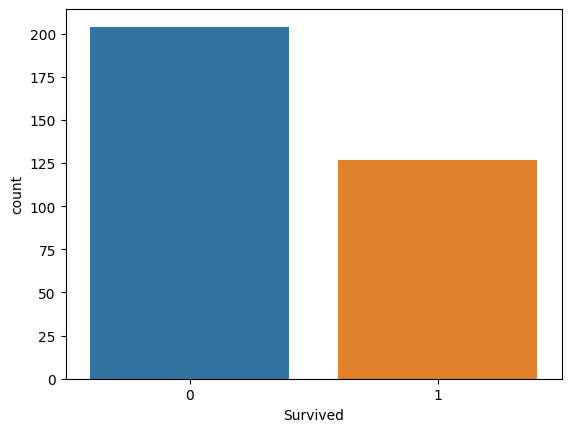

Pclass


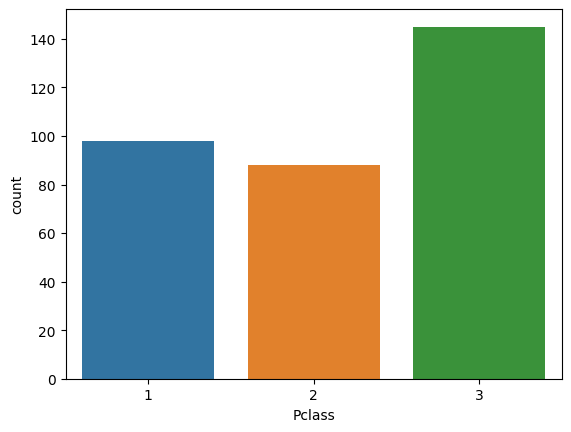

Sex


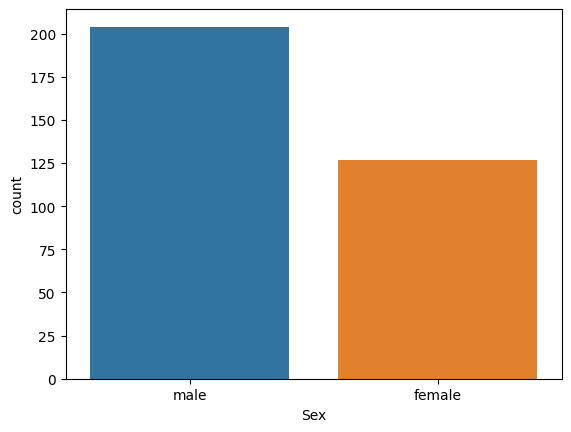

Embarked


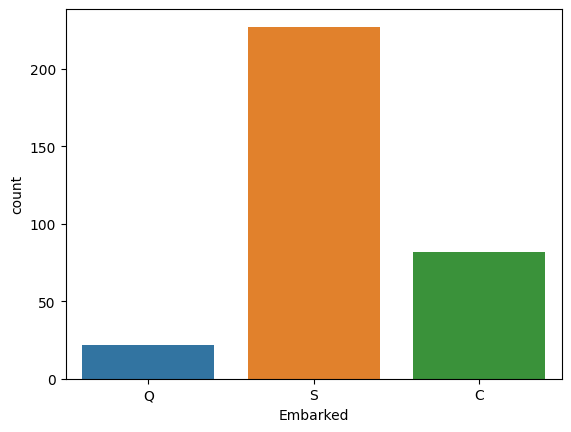

In [98]:
for column in df.columns:
    unique_values = df[column].unique()
    if 0 < unique_values.size <= 3:
        print(column)


        sns.countplot(data=df,x=column)
        plt.show()

In [99]:

for column in df.columns:
    unique_values = df[column].unique()
    if 0 < unique_values.size <= 3:
        print(df[column].value_counts())
        print(df[column].value_counts(normalize=True))
        print("***"*10)


0    204
1    127
Name: Survived, dtype: int64
0    0.616314
1    0.383686
Name: Survived, dtype: float64
******************************
3    145
1     98
2     88
Name: Pclass, dtype: int64
3    0.438066
1    0.296073
2    0.265861
Name: Pclass, dtype: float64
******************************
male      204
female    127
Name: Sex, dtype: int64
male      0.616314
female    0.383686
Name: Sex, dtype: float64
******************************
S    227
C     82
Q     22
Name: Embarked, dtype: int64
S    0.685801
C    0.247734
Q    0.066465
Name: Embarked, dtype: float64
******************************


In [100]:
selected_columns = df[[ 'Sex',  'Embarked', 'Parch', 'SibSp', 'Pclass']]


In [101]:
for column in selected_columns:
  print(df.groupby(column).Survived.value_counts())
  print("***"*10)


Sex     Survived
female  1           127
male    0           204
Name: Survived, dtype: int64
******************************
Embarked  Survived
C         0            45
          1            37
Q         1            12
          0            10
S         0           149
          1            78
Name: Survived, dtype: int64
******************************
Parch  Survived
0      0           167
       1            79
1      1            28
       0            22
2      1            17
       0            12
3      1             2
       0             1
4      1             1
5      0             1
6      0             1
Name: Survived, dtype: int64
******************************
SibSp  Survived
0      0           144
       1            69
1      1            50
       0            47
2      0             6
       1             5
3      0             3
       1             1
4      0             3
       1             1
5      1             1
8      0             1
Name: Survived, dty

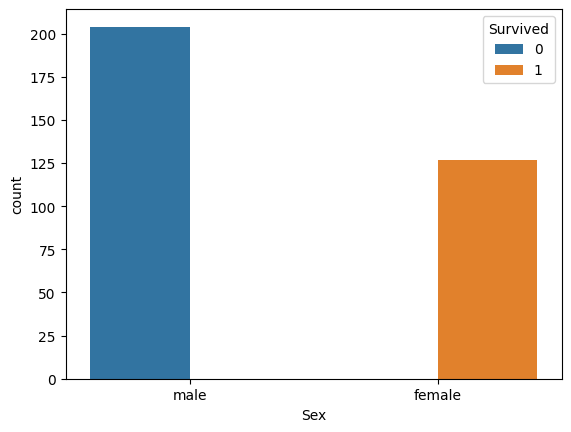

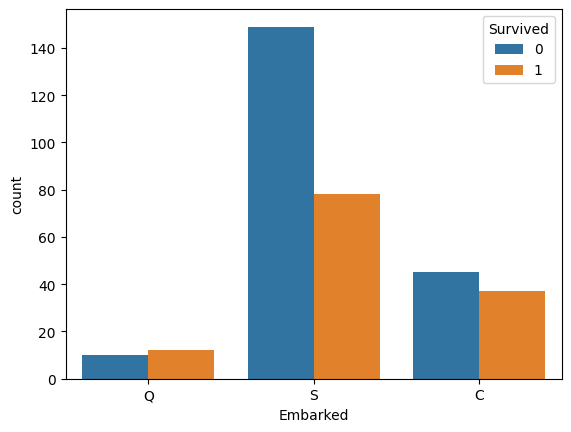

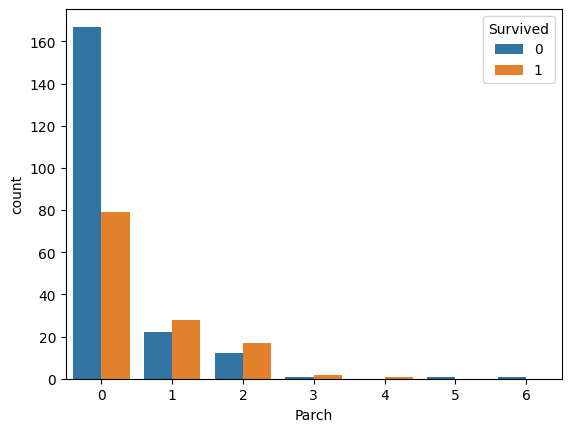

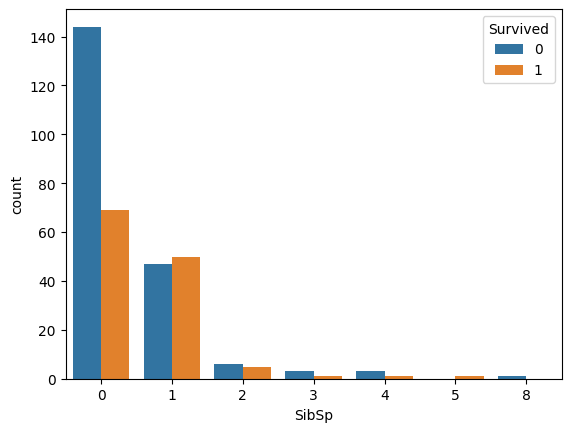

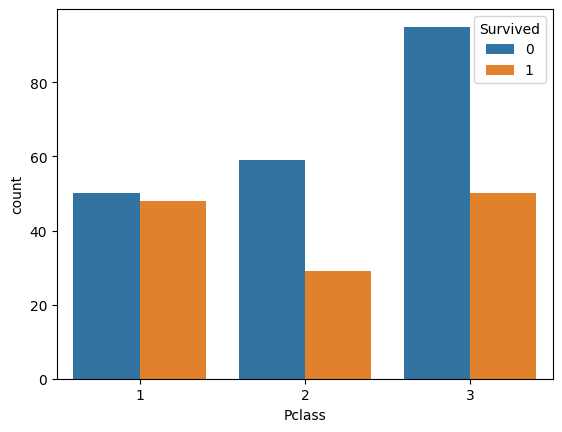

In [102]:
for column in selected_columns:
   sns.countplot(data=df, x=column ,hue='Survived')
   plt.show()




In [103]:
df = df.drop(['PassengerId', 'Name',  'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
409,1,3,female,3.0,1,1,13.7750,S
411,1,1,female,37.0,1,0,90.0000,Q
412,1,3,female,28.0,0,0,7.7750,S
414,1,1,female,39.0,0,0,108.9000,C


In [104]:
# Define a function to encode the 'Embarked' column
def encode_embarked(value):
    if value == 'C':
        return 0
    elif value == 'Q':
        return 1
    else:
        return 2

# Apply the encoding function to the 'Embarked' column
df['Embarked'] = df['Embarked'].apply(encode_embarked)


In [105]:
# Define a function to encode the 'Sex' column
def encode_sex(value):
    if value == 'male':
        return 0
    else:
        return 1

# Apply the encoding function to the 'Sex' column
df['Sex'] = df['Sex'].apply(encode_sex)

In [106]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,2
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,2
4,1,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
409,1,3,1,3.0,1,1,13.7750,2
411,1,1,1,37.0,1,0,90.0000,1
412,1,3,1,28.0,0,0,7.7750,2
414,1,1,1,39.0,0,0,108.9000,0


In [107]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [108]:
# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0])

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0

Text(0, 0.5, 'Prediction')

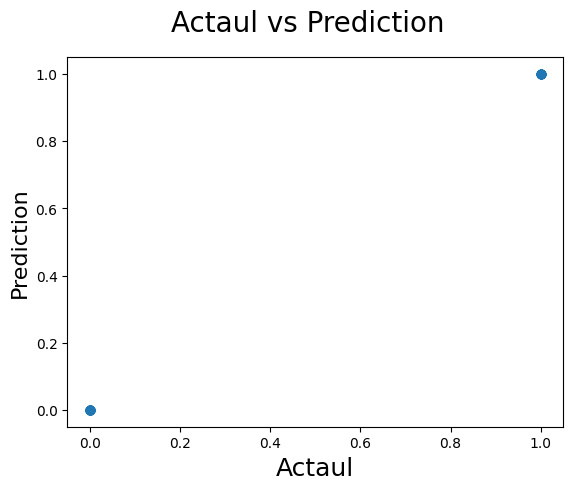

In [111]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Actaul vs Prediction', fontsize=20)              # Plot heading
plt.xlabel('Actaul', fontsize=18)                          # X-label
plt.ylabel('Prediction', fontsize=16)

In [112]:
model2=RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
prediction2= model2.predict(X_test)
prediction2

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0])

In [114]:
model2.feature_importances_


array([0.01057459, 0.80588018, 0.05443471, 0.0258779 , 0.02193318,
       0.06812467, 0.01317478])

In [115]:
fi=pd.DataFrame({'importance':model2.feature_importances_},index=X.columns)
fi.sort_values('importance',ascending=False)


,importance
Sex,0.805880
Fare,0.068125
Age,0.054435
SibSp,0.025878
Parch,0.021933
Embarked,0.013175
Pclass,0.010575


Text(0.5, 1.0, 'Feature Importance')

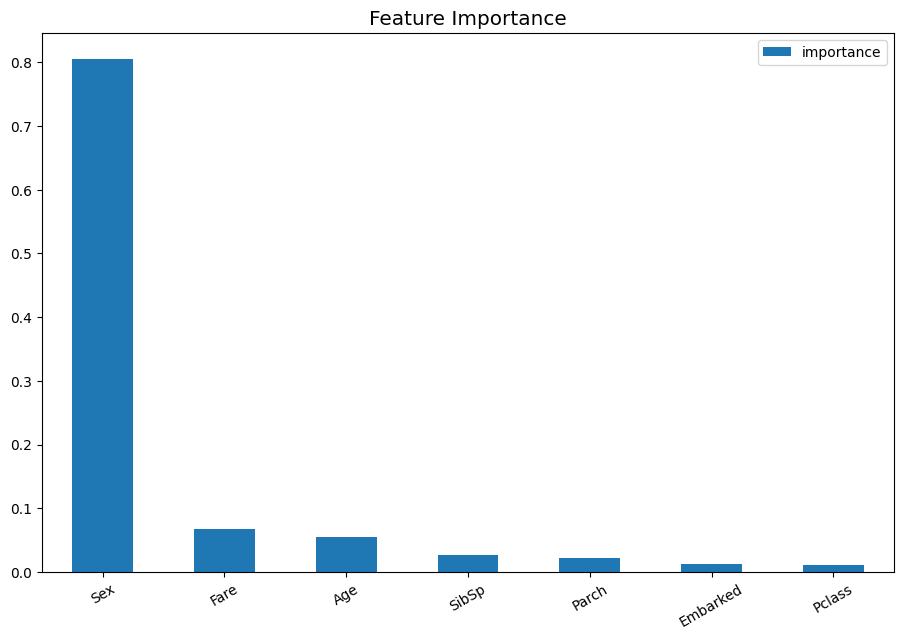

In [116]:
fi.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

In [117]:
accuracy_score(y_test, prediction2)

1.0